## ANN

In [15]:
# Daten definieren
 
X = np.array( [ [ 1, 0, 1 ],
                [ 0, 1, 1 ],
                [ 0, 0, 1 ],
                [ 1, 1, 1 ],
                [ 0, 1, 1 ],
                [ 1, 0, 1 ] ] )

y = np.array( [ 0, 1, 0, 1, 1, 0 ] ).T

weights = np.array([0.5,0.48,-0.7])
l_rate = 0.1



# Aktivierungsfunktiuon
def sigmoid(x):
    """
    Sigmoid function
    """
    return 1/(1 + np.exp(-x)) 

# Sigmoid Ableitung
def sigmoid_deriv(output):
    return output * (1 - output )


# Fehler über Epochen speichern
loss_per_epoch = []

# Das Learning
for epoch in range(500):
    total_error = 0  # wichtig!
    print(f"\nEpoch {epoch+1}")
    for i in range(len(y)):
        input = X[i]
        target = y[i]

        weighted_sum = np.dot(input, weights)
        prediction = sigmoid(weighted_sum) # gewichteter Summe

        # Error
        error = (prediction - target) ** 2
        total_error += error  # Akkumulieren

        # Backpropagation
        # Das ist die Ableitung der Lossfunktion (prediction−target)^2 nach der Vorhersage predictionprediction.
        derror_dpred = 2 * (prediction - target)
        dpred_dz = sigmoid_deriv(prediction)
        dz_dw = input

        gradient = derror_dpred * dpred_dz * dz_dw
        weights -= l_rate * gradient

        print(f"Prediction: {prediction:.4f}  Error: {error:.4f}")

    # Fehler am Ende der Epoche speichern
    loss_per_epoch.append(total_error)



print(f"\nFinal Weights: {weights}")



Epoch 1
Prediction: 0.4502  Error: 0.2026
Prediction: 0.4397  Error: 0.3139
Prediction: 0.3330  Error: 0.1109
Prediction: 0.5685  Error: 0.1862
Prediction: 0.4602  Error: 0.2914
Prediction: 0.4594  Error: 0.2111

Epoch 2
Prediction: 0.4481  Error: 0.2008
Prediction: 0.4624  Error: 0.2891
Prediction: 0.3363  Error: 0.1131
Prediction: 0.5845  Error: 0.1726
Prediction: 0.4820  Error: 0.2683
Prediction: 0.4565  Error: 0.2083

Epoch 3
Prediction: 0.4452  Error: 0.1982
Prediction: 0.4838  Error: 0.2665
Prediction: 0.3390  Error: 0.1149
Prediction: 0.5989  Error: 0.1609
Prediction: 0.5025  Error: 0.2475
Prediction: 0.4527  Error: 0.2049

Epoch 4
Prediction: 0.4416  Error: 0.1950
Prediction: 0.5039  Error: 0.2461
Prediction: 0.3412  Error: 0.1164
Prediction: 0.6116  Error: 0.1508
Prediction: 0.5216  Error: 0.2288
Prediction: 0.4482  Error: 0.2009

Epoch 5
Prediction: 0.4372  Error: 0.1912
Prediction: 0.5227  Error: 0.2279
Prediction: 0.3428  Error: 0.1175
Prediction: 0.6230  Error: 0.1422
Pre

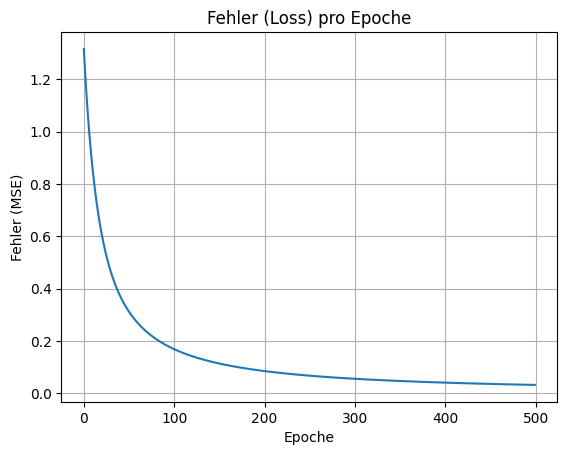

In [16]:
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)
plt.title("Fehler (Loss) pro Epoche")
plt.xlabel("Epoche")
plt.ylabel("Fehler (MSE)")
plt.grid(True)
plt.show()

## Pytorch

In [17]:
import torch

# Daten
X = torch.tensor([
    [1., 0., 1.],
    [0., 1., 1.],
    [0., 0., 1.],
    [1., 1., 1.],
    [0., 1., 1.],
    [1., 0., 1.]
], dtype=torch.float32)

y = torch.tensor([0., 1., 0., 1., 1., 0.], dtype=torch.float32)

# Gewichte + Lernrate
weights = torch.tensor([0.5, 0.48, -0.7], dtype=torch.float32, requires_grad=True)
l_rate = 0.1

loss_per_epoch = []

# Training
for epoch in range(500):
    total_error = 0.0
    print(f"\nEpoch {epoch+1}")

    for i in range(len(y)):
        x = X[i]
        t = y[i]

        # Vorwärts
        weighted_sum = (x * weights).sum()
        prediction = torch.sigmoid(weighted_sum)

        # Loss (MSE wie in deinem Code)
        error = (prediction - t) ** 2
        total_error += error.item()

        # Backprop
        error.backward()                     # Gradienten für 'weights' werden berechnet

        # Manuelles Gradient Descent-Update
        with torch.no_grad():
            weights -= l_rate * weights.grad
            weights.grad.zero_()            # Gradienten für den nächsten Schritt zurücksetzen

        print(f"Prediction: {prediction.item():.4f}  Error: {error.item():.4f}")

    loss_per_epoch.append(total_error)

print("\nFinal Weights:", weights.detach().numpy())



Epoch 1
Prediction: 0.4502  Error: 0.2026
Prediction: 0.4397  Error: 0.3139
Prediction: 0.3330  Error: 0.1109
Prediction: 0.5685  Error: 0.1862
Prediction: 0.4602  Error: 0.2914
Prediction: 0.4594  Error: 0.2111

Epoch 2
Prediction: 0.4481  Error: 0.2008
Prediction: 0.4624  Error: 0.2891
Prediction: 0.3363  Error: 0.1131
Prediction: 0.5845  Error: 0.1726
Prediction: 0.4820  Error: 0.2683
Prediction: 0.4565  Error: 0.2083

Epoch 3
Prediction: 0.4452  Error: 0.1982
Prediction: 0.4838  Error: 0.2665
Prediction: 0.3390  Error: 0.1149
Prediction: 0.5989  Error: 0.1609
Prediction: 0.5025  Error: 0.2475
Prediction: 0.4527  Error: 0.2049

Epoch 4
Prediction: 0.4416  Error: 0.1950
Prediction: 0.5039  Error: 0.2461
Prediction: 0.3412  Error: 0.1164
Prediction: 0.6116  Error: 0.1508
Prediction: 0.5216  Error: 0.2288
Prediction: 0.4482  Error: 0.2009

Epoch 5
Prediction: 0.4372  Error: 0.1912
Prediction: 0.5227  Error: 0.2279
Prediction: 0.3428  Error: 0.1175
Prediction: 0.6230  Error: 0.1422
Pre

Prediction: 0.9210  Error: 0.0062
Prediction: 0.0987  Error: 0.0097

Epoch 219
Prediction: 0.0984  Error: 0.0097
Prediction: 0.9209  Error: 0.0063
Prediction: 0.1658  Error: 0.0275
Prediction: 0.8642  Error: 0.0185
Prediction: 0.9212  Error: 0.0062
Prediction: 0.0984  Error: 0.0097

Epoch 220
Prediction: 0.0981  Error: 0.0096
Prediction: 0.9211  Error: 0.0062
Prediction: 0.1655  Error: 0.0274
Prediction: 0.8645  Error: 0.0184
Prediction: 0.9214  Error: 0.0062
Prediction: 0.0982  Error: 0.0096

Epoch 221
Prediction: 0.0979  Error: 0.0096
Prediction: 0.9213  Error: 0.0062
Prediction: 0.1651  Error: 0.0273
Prediction: 0.8648  Error: 0.0183
Prediction: 0.9216  Error: 0.0061
Prediction: 0.0979  Error: 0.0096

Epoch 222
Prediction: 0.0976  Error: 0.0095
Prediction: 0.9215  Error: 0.0062
Prediction: 0.1648  Error: 0.0272
Prediction: 0.8651  Error: 0.0182
Prediction: 0.9218  Error: 0.0061
Prediction: 0.0977  Error: 0.0095

Epoch 223
Prediction: 0.0974  Error: 0.0095
Prediction: 0.9217  Error: 

Prediction: 0.9432  Error: 0.0032
Prediction: 0.1243  Error: 0.0154
Prediction: 0.8990  Error: 0.0102
Prediction: 0.9433  Error: 0.0032
Prediction: 0.0709  Error: 0.0050

Epoch 391
Prediction: 0.0707  Error: 0.0050
Prediction: 0.9433  Error: 0.0032
Prediction: 0.1241  Error: 0.0154
Prediction: 0.8991  Error: 0.0102
Prediction: 0.9434  Error: 0.0032
Prediction: 0.0708  Error: 0.0050

Epoch 392
Prediction: 0.0706  Error: 0.0050
Prediction: 0.9434  Error: 0.0032
Prediction: 0.1239  Error: 0.0154
Prediction: 0.8993  Error: 0.0101
Prediction: 0.9435  Error: 0.0032
Prediction: 0.0707  Error: 0.0050

Epoch 393
Prediction: 0.0705  Error: 0.0050
Prediction: 0.9435  Error: 0.0032
Prediction: 0.1238  Error: 0.0153
Prediction: 0.8994  Error: 0.0101
Prediction: 0.9436  Error: 0.0032
Prediction: 0.0706  Error: 0.0050

Epoch 394
Prediction: 0.0704  Error: 0.0050
Prediction: 0.9435  Error: 0.0032
Prediction: 0.1236  Error: 0.0153
Prediction: 0.8995  Error: 0.0101
Prediction: 0.9437  Error: 0.0032
Pred

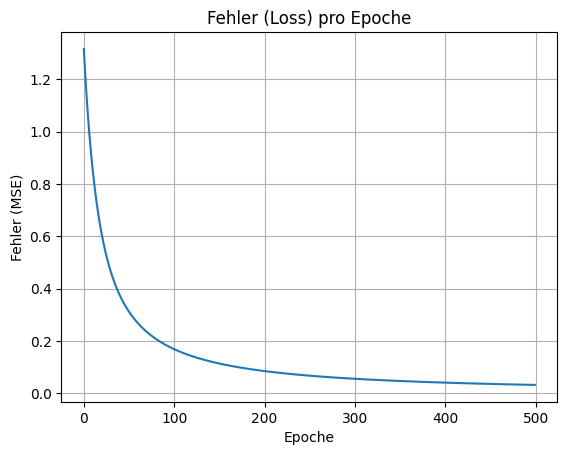

In [18]:
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)
plt.title("Fehler (Loss) pro Epoche")
plt.xlabel("Epoche")
plt.ylabel("Fehler (MSE)")
plt.grid(True)
plt.show()

## Fast AI

In [19]:
from fastai.vision.all import *
import torch.nn.functional as F
import matplotlib.pyplot as plt


In [20]:
# 1. Daten entpacken
path = untar_data(URLs.MNIST_SAMPLE)
path

Path('/home/lukelo/.fastai/data/mnist_sample')

In [21]:
path.ls()

(#3) [Path('/home/lukelo/.fastai/data/mnist_sample/labels.csv'),Path('/home/lukelo/.fastai/data/mnist_sample/valid'),Path('/home/lukelo/.fastai/data/mnist_sample/train')]

In [22]:
# 2. DataBlock definieren — explizit für Graustufen-Bilder
dblock = DataBlock(
    blocks=(ImageBlock(PILImageBW), CategoryBlock),   # ➡️ PILImageBW lädt 1-Kanal
    get_items=get_image_files,
    splitter=GrandparentSplitter(valid_name='valid'),
    get_y=parent_label,
    item_tfms=Resize(28),                             # macht (28,28)
    batch_tfms=[IntToFloatTensor()]                   # skaliert in FloatTensor [0,1]
)

In [23]:
# 3. DataLoaders erzeugen
dls = dblock.dataloaders(path, bs=64)

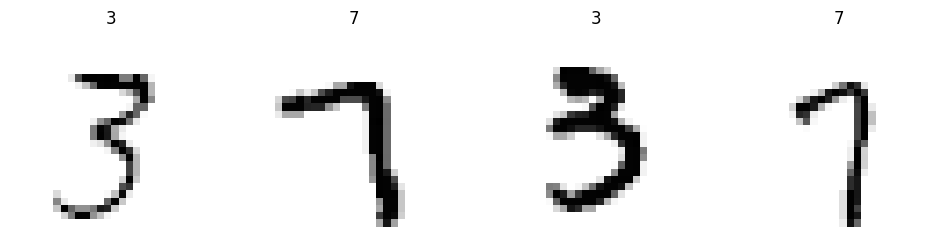

In [24]:
dls.train.show_batch(max_n=4, nrows=1)

epoch,train_loss,valid_loss,bin_accuracy,time
0,0.048128,0.039455,0.971050,00:02
1,0.028893,0.032995,0.972031,00:02
2,0.024147,0.027915,0.976938,00:02
3,0.022162,0.026620,0.975957,00:02
4,0.019997,0.024348,0.979392,00:02
5,0.019505,0.022869,0.979392,00:02
6,0.018979,0.022158,0.981354,00:02
7,0.016340,0.021658,0.981354,00:02
8,0.014919,0.021201,0.981845,00:03
9,0.014792,0.020322,0.981845,00:03


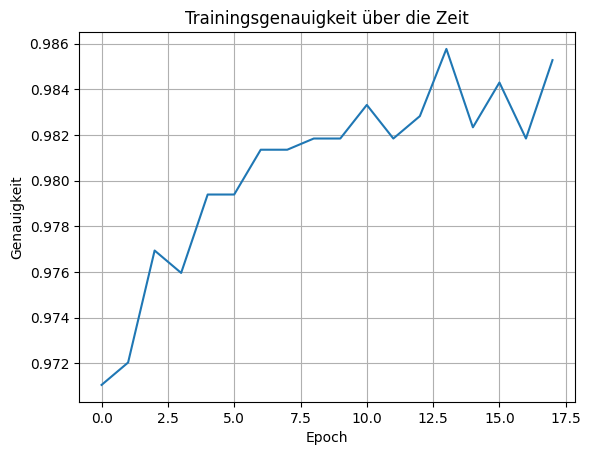

Finale Genauigkeit: 0.9853


In [25]:
import torch
import torch.nn as nn
from fastai.vision.all import *

# --- Loss: arbeite mit Logits, gleiche Formen ---
def mnist_loss(logits, targets):
    probs = logits.sigmoid()                       # Logits -> Wahrscheinlichkeit
    targets = targets.view_as(probs).float()       # (bs,) -> (bs,1)
    return torch.where(targets==1, 1-probs, probs).mean()

# --- Metric: Accuracy für binär (ein Logit) ---
def bin_accuracy(logits, targets):
    preds = (logits.sigmoid() > 0.5).float()
    targets = targets.view_as(preds).float()
    return (preds == targets).float().mean()

class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.layer1  = nn.LazyLinear(30)  # lernt die Eingangsfeature-Zahl automatisch (784 oder 2352)
        self.relu    = nn.ReLU()
        self.layer2  = nn.Linear(30, 1)   # ein Logit für binär
    def forward(self, x):
        x = self.flatten(x)
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

simple_net = SimpleNet()

learn = Learner(
    dls,
    simple_net,
    opt_func=SGD,
    loss_func=mnist_loss,     # deine custom Loss (jetzt logits-sicher)
    metrics=bin_accuracy      # passende binäre Accuracy
)

learn.fit(18, 0.1)

# Plot & finale Accuracy
plt.plot(L(learn.recorder.values).itemgot(2))
plt.xlabel("Epoch"); plt.ylabel("Genauigkeit"); plt.title("Trainingsgenauigkeit über die Zeit"); plt.grid(True); plt.show()

final_accuracy = learn.recorder.values[-1][2]
print(f"Finale Genauigkeit: {final_accuracy:.4f}")


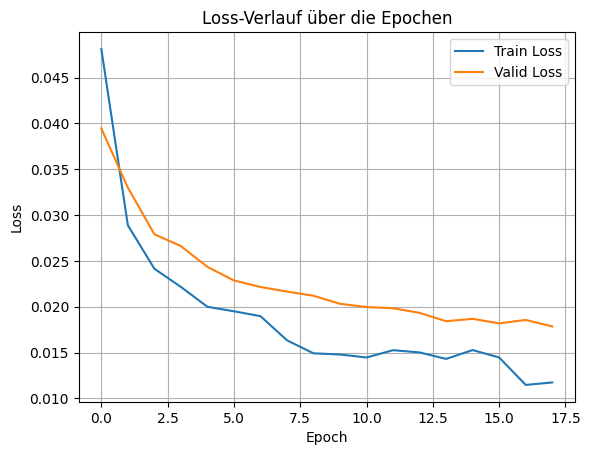

In [26]:
# --- Training- und Validierungs-Loss extrahieren ---
train_loss = [v[0] for v in learn.recorder.values]
valid_loss = [v[1] for v in learn.recorder.values]

# --- Plot ---
plt.plot(train_loss, label="Train Loss")
plt.plot(valid_loss, label="Valid Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss-Verlauf über die Epochen")
plt.legend()
plt.grid(True)
plt.show()
